**cleaning part**

In [2]:
# Cardiotocographicc dataset cleaning

import pandas as pd
import numpy as np
df = pd.read_csv('Cardiotocographic.csv')

# using median
df_filled = df.fillna(df.median(numeric_only=True))

# Replace invalid negative values with NaN
non_negative_cols = ['FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in non_negative_cols:
    df_filled.loc[df_filled[col] < 0, col] = np.nan

# Reimpute those NaNs with median again
df_cleaned = df_filled.fillna(df_filled.median(numeric_only=True))

# outlierr treatment using IQR method
def treat_outliers_iqr(column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(df_cleaned[column] < lower, lower,
                    np.where(df_cleaned[column] > upper, upper, df_cleaned[column]))

# Apply to all col
for col in df_cleaned.columns:
    df_cleaned[col] = treat_outliers_iqr(col)

# removed duplicates rows
df_cleaned = df_cleaned.drop_duplicates()

# shape and preview
print(f"Final dataset shape: {df_cleaned.shape}")
df_cleaned.head()


Final dataset shape: (2117, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,19.95,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0


**Downloaded Cleaned Dataset**

In [4]:
from google.colab import files

df_cleaned.to_csv('Cleaned_Cardiotocographic.csv', index=False)
files.download('Cleaned_Cardiotocographic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Statistical Summary**

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('Cleaned_Cardiotocographic.csv')

#statistical summary: Mean, Median, Std Dev, and IQR
summary_stats = pd.DataFrame(index=df.columns)

summary_stats['Mean'] = df.mean()
summary_stats['Median'] = df.median()
summary_stats['Standard Deviation'] = df.std()
summary_stats['IQR'] = df.quantile(0.75) - df.quantile(0.25)

# Round values for better readability
summary_stats = summary_stats.round(3)


print("Statistical Summary of Cleaned Cardiotocographic Dataset:\n")
print(summary_stats)


Statistical Summary of Cleaned Cardiotocographic Dataset:

             Mean   Median  Standard Deviation     IQR
LB        133.290  133.000               9.926  14.000
AC          0.003    0.002               0.004   0.006
FM          0.002    0.000               0.002   0.003
UC          0.004    0.005               0.003   0.005
DL          0.002    0.000               0.003   0.003
DS          0.000    0.000               0.000   0.000
DP          0.000    0.000               0.000   0.000
ASTV       47.147   49.000              17.373  29.000
MSTV        1.308    1.200               0.778   1.000
ALTV        6.707    0.000              10.328  11.000
MLTV        8.043    7.400               4.978   6.100
Width      70.634   67.000              39.129  63.000
Tendency    0.397    0.000               0.496   1.000
NSP         1.000    1.000               0.000   0.000


**Visualization**

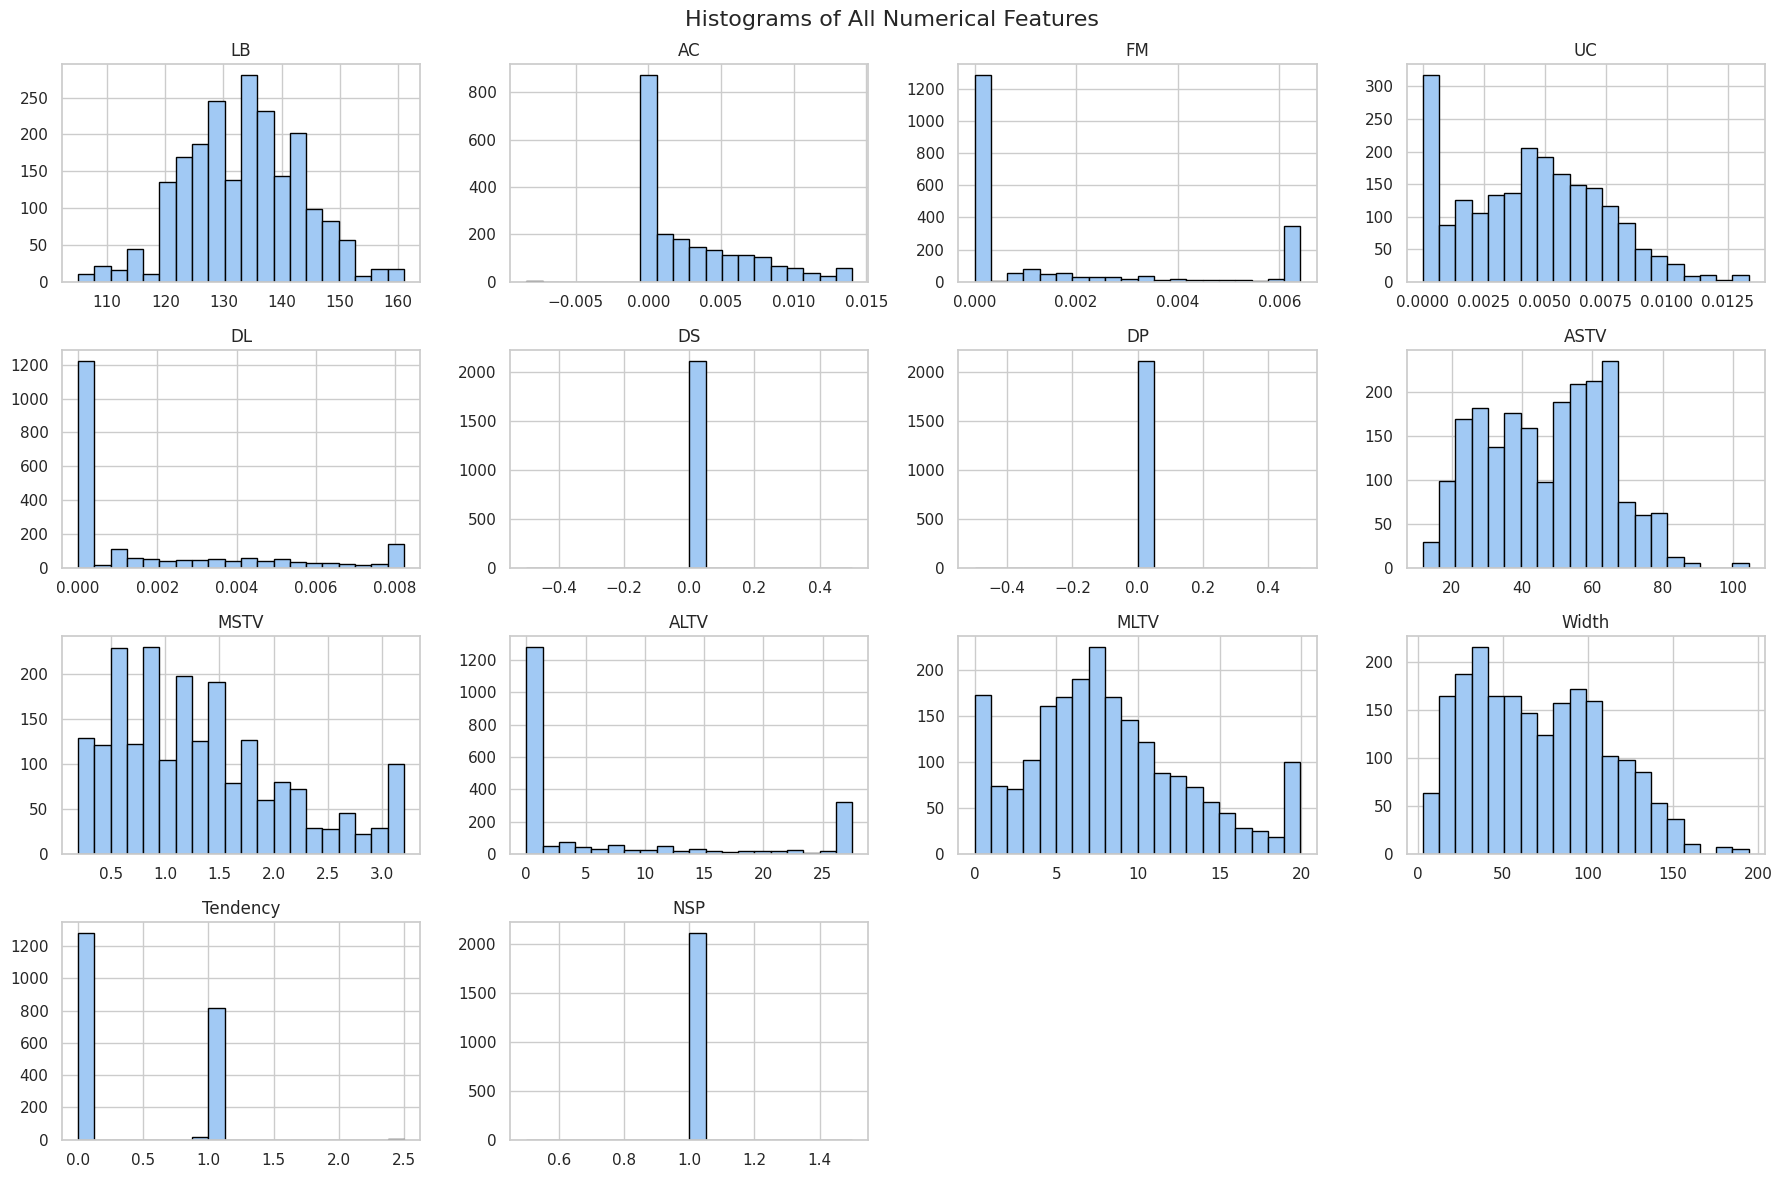

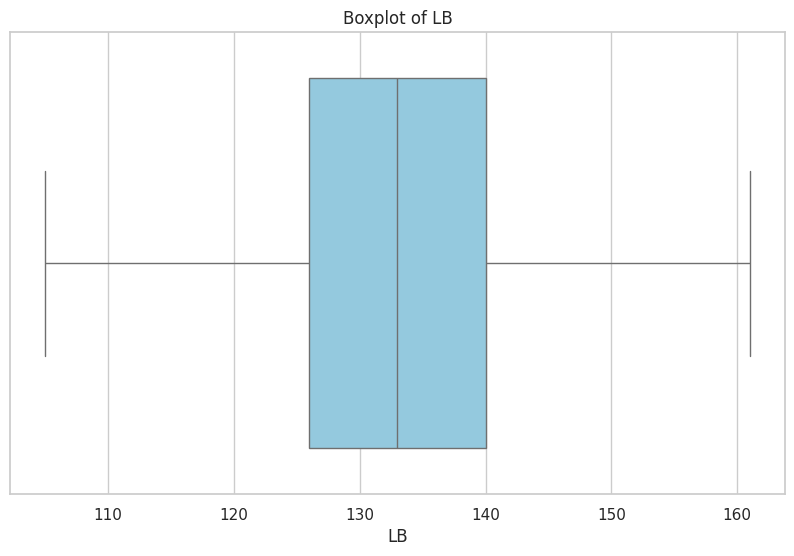

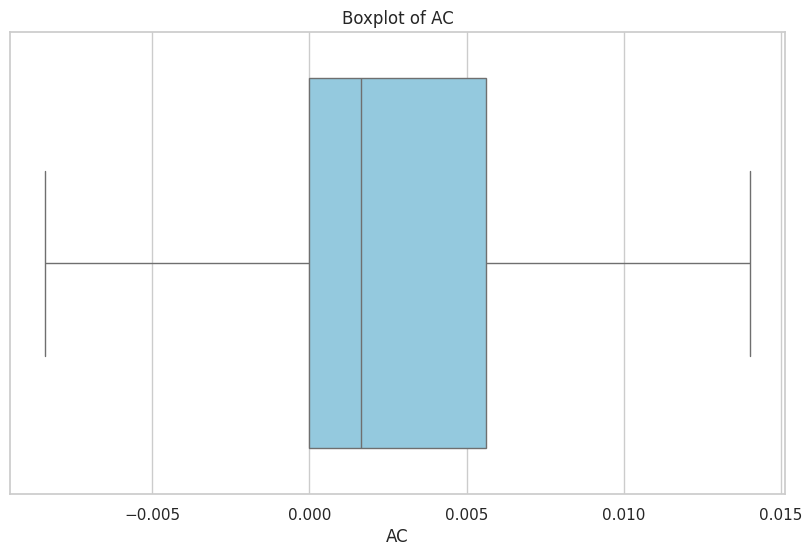

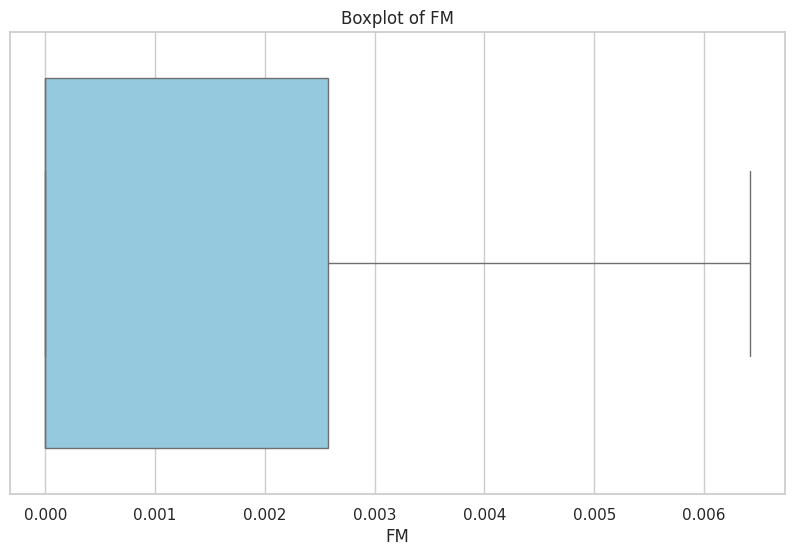

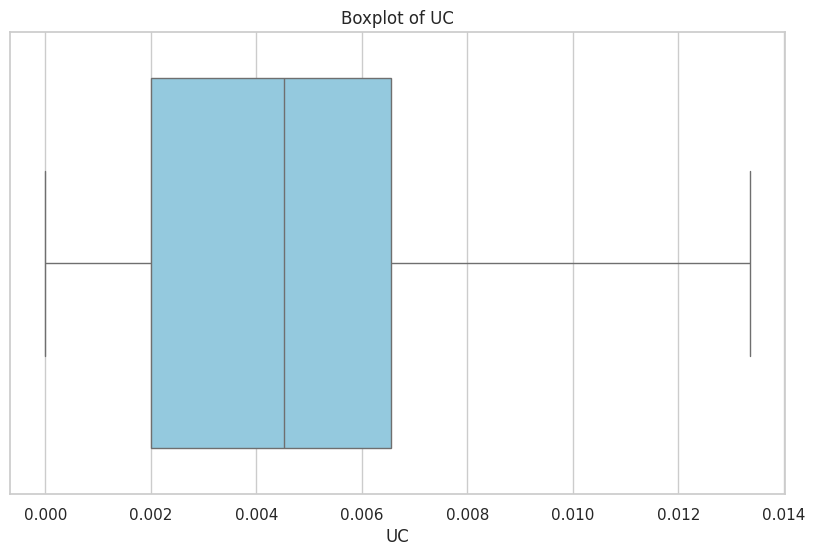

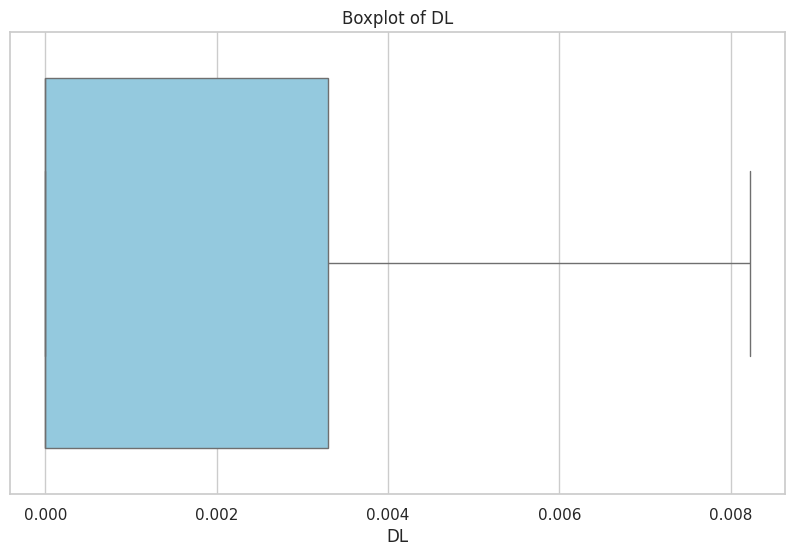

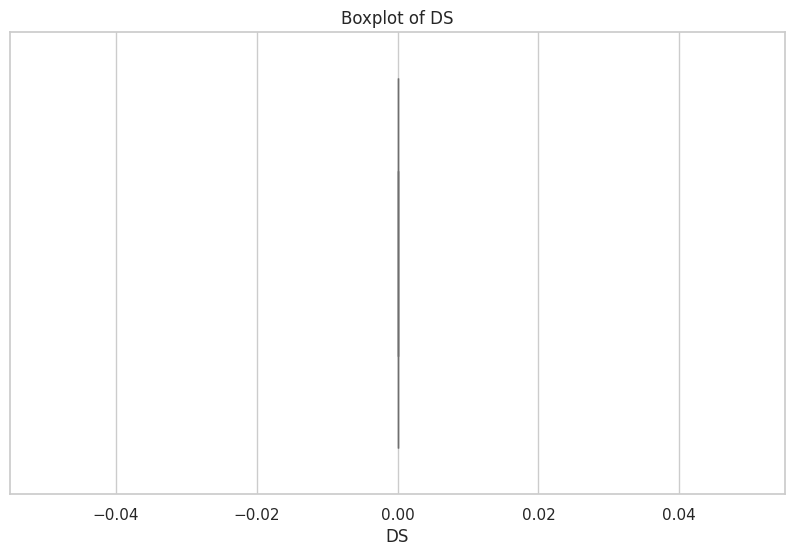

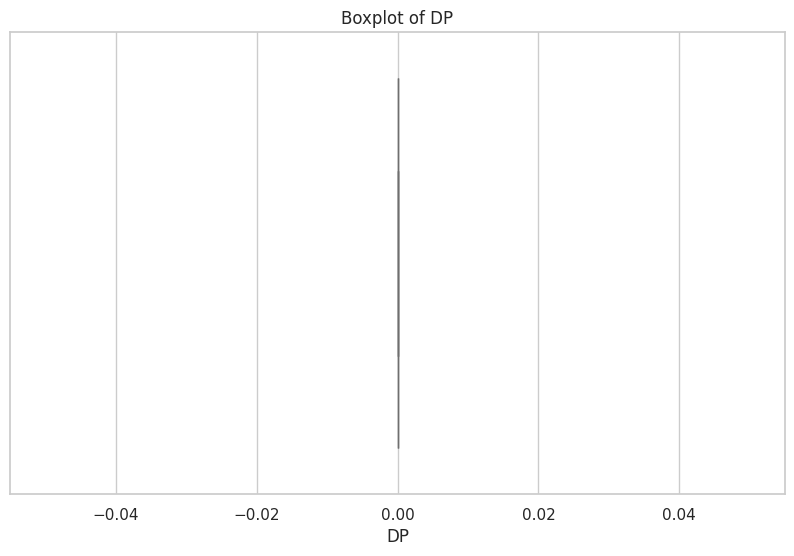

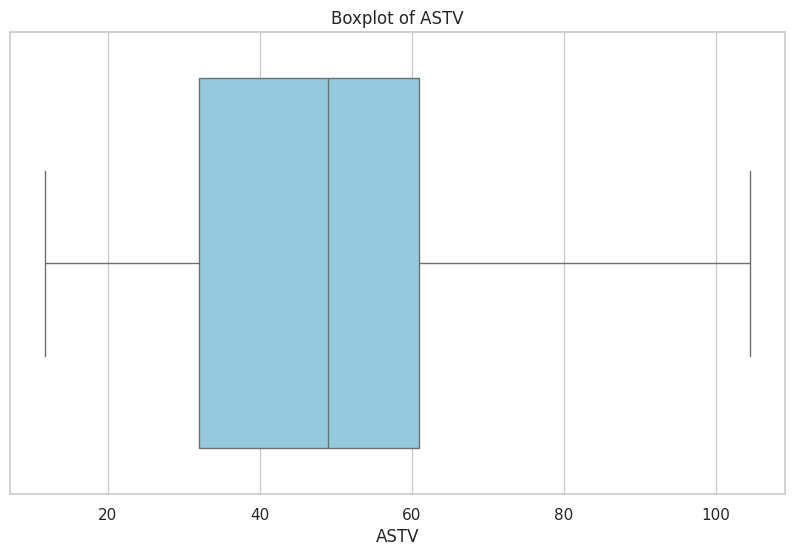

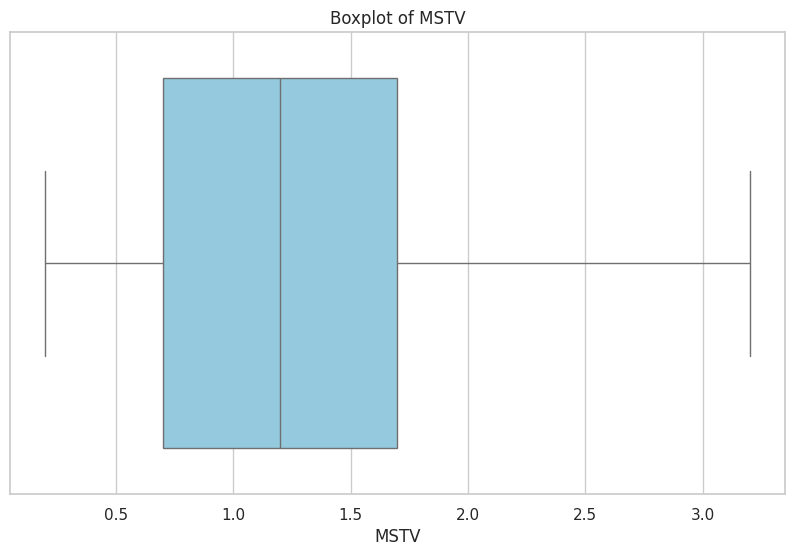

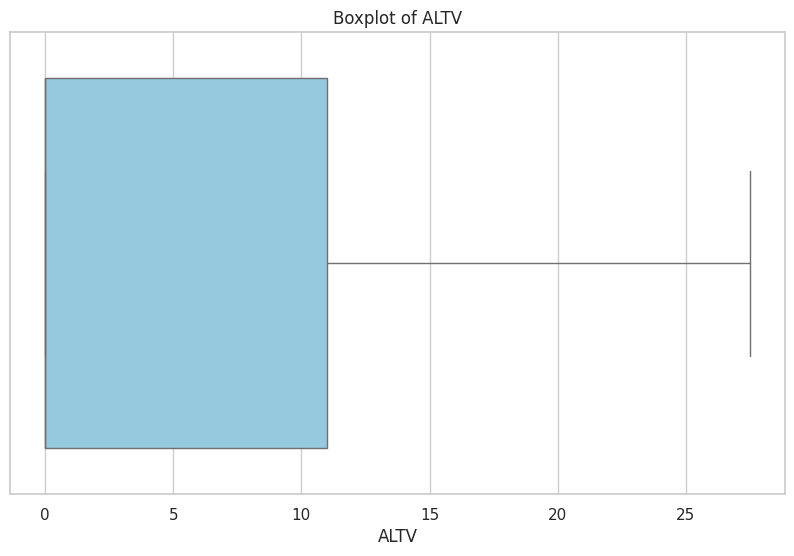

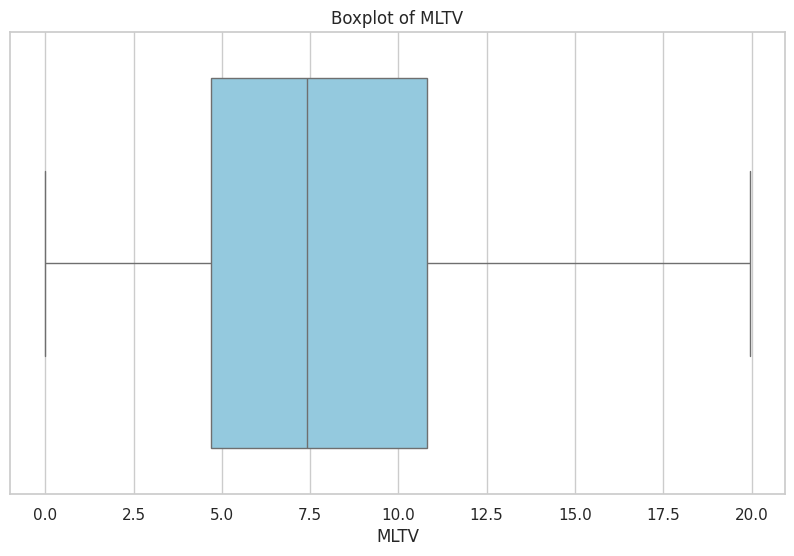

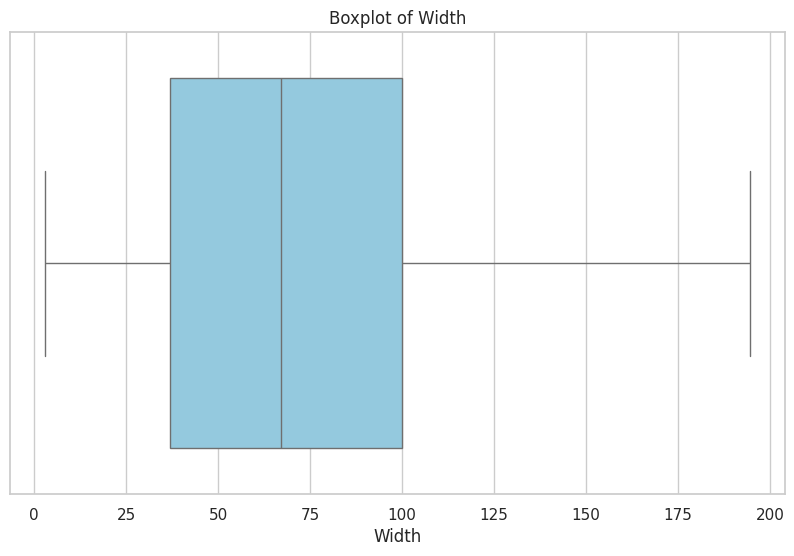

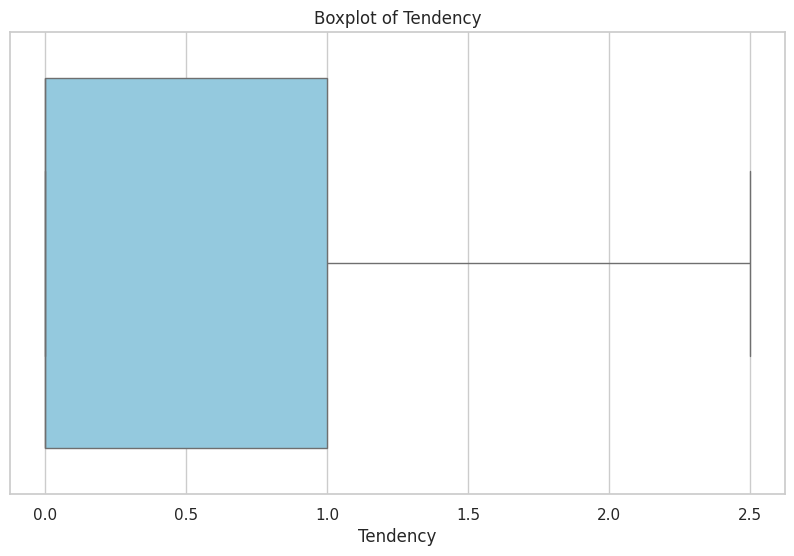

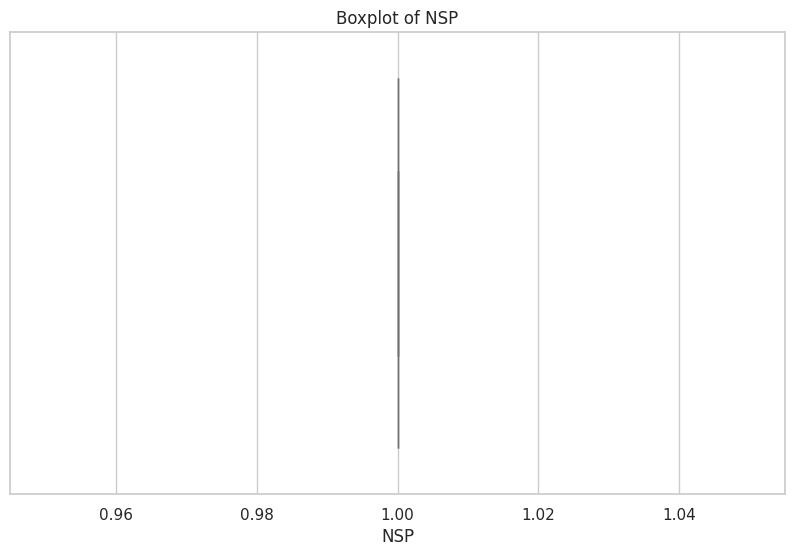

/tmp/ipython-input-9-4229979127.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NSP', palette='pastel')


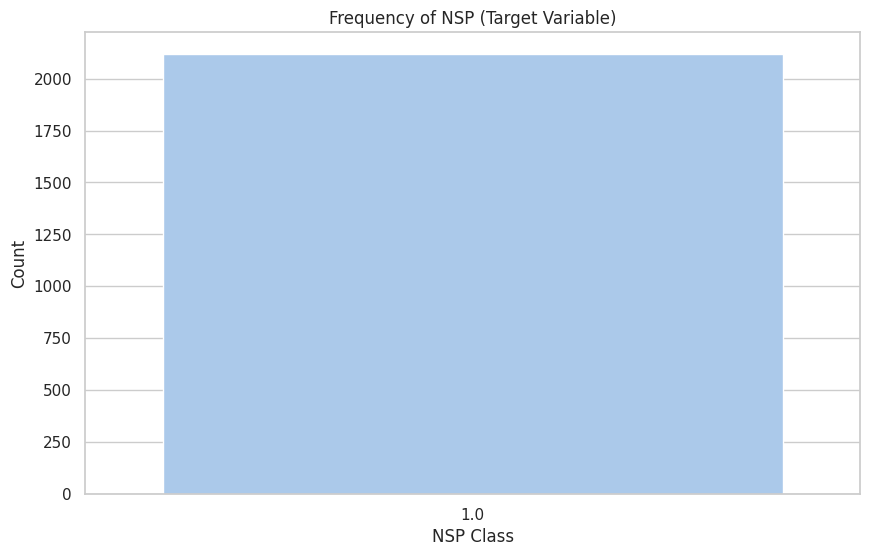

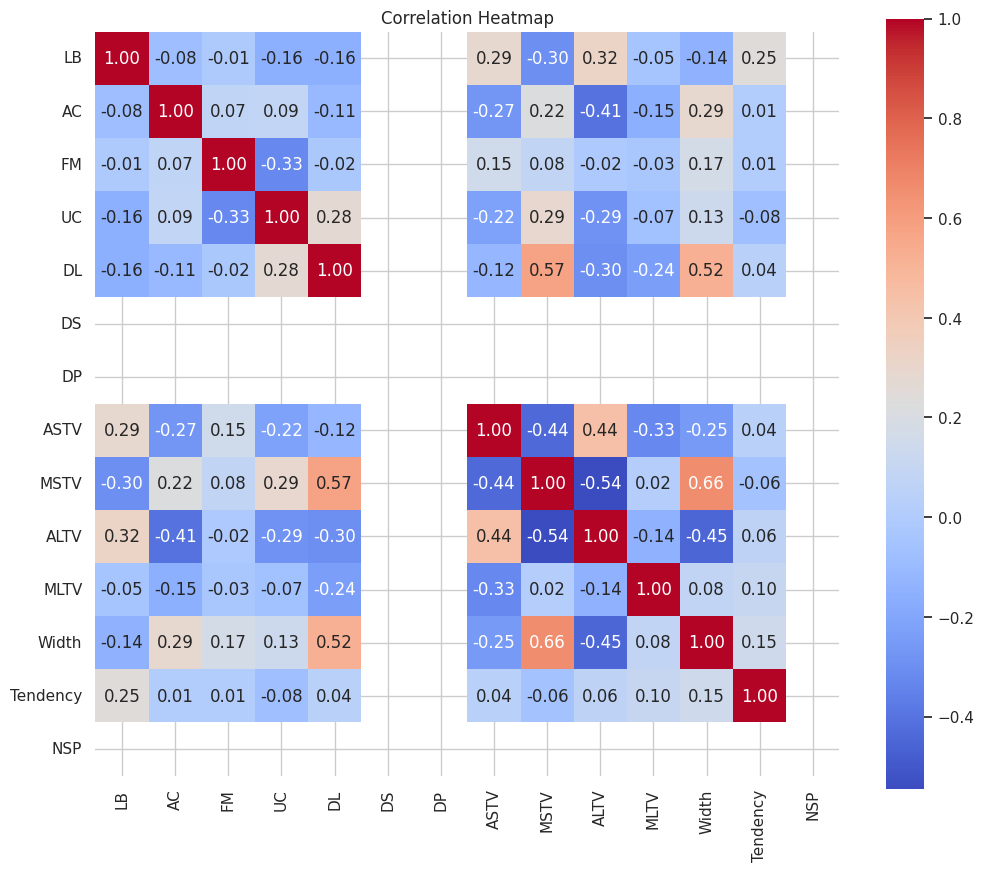

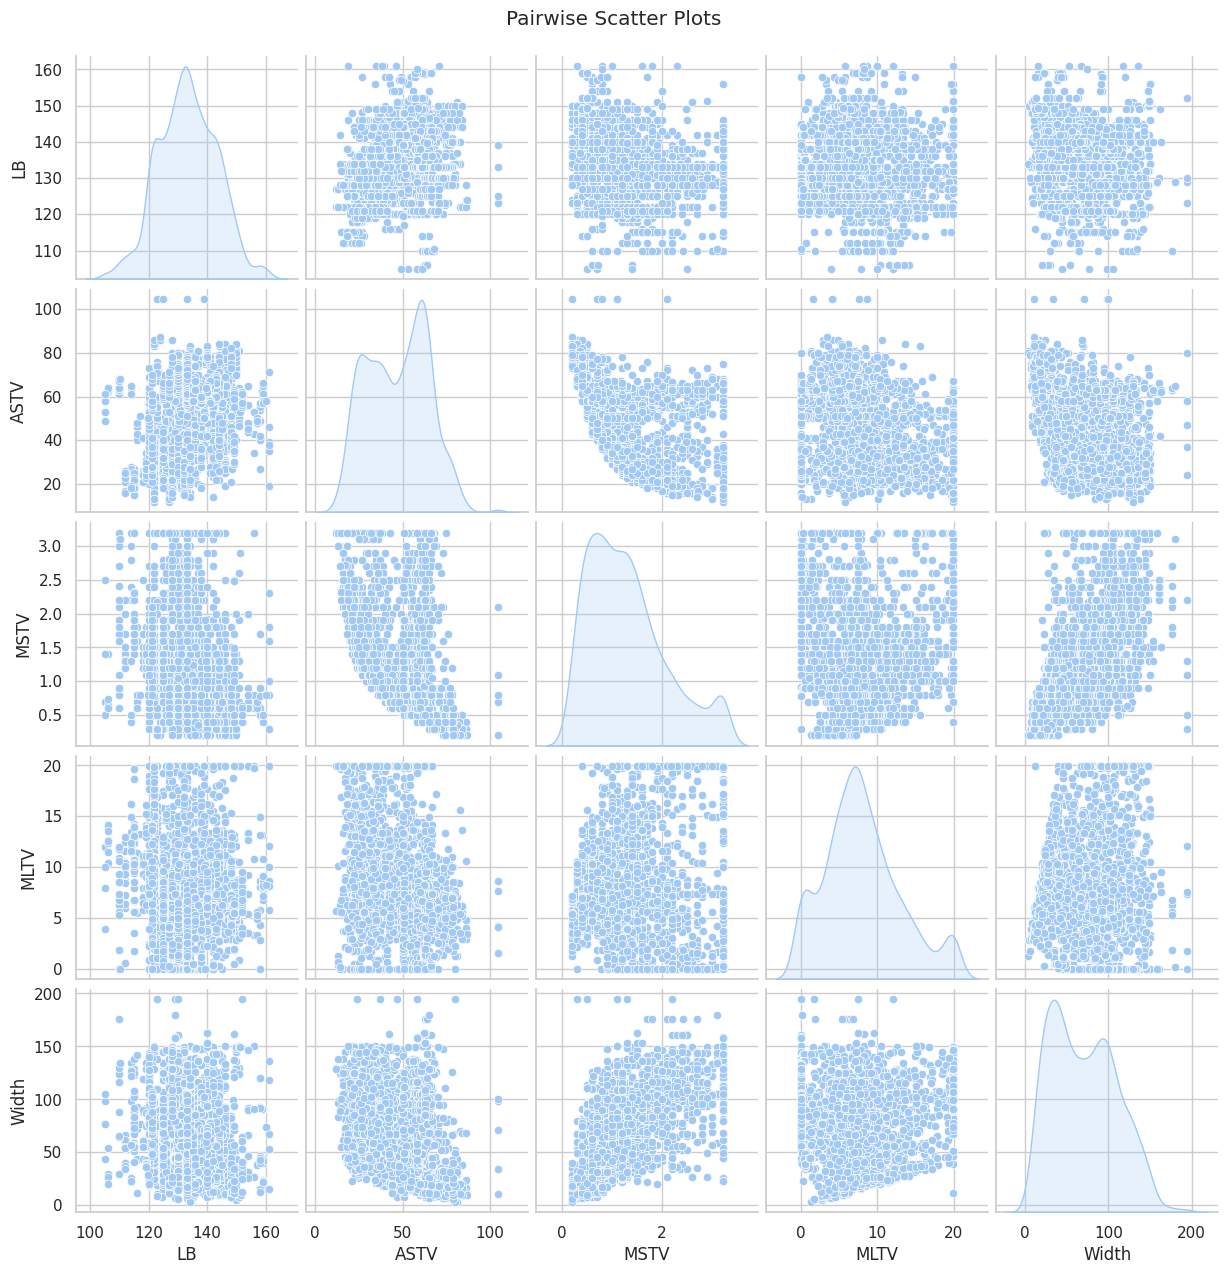

/tmp/ipython-input-9-4229979127.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette='muted')


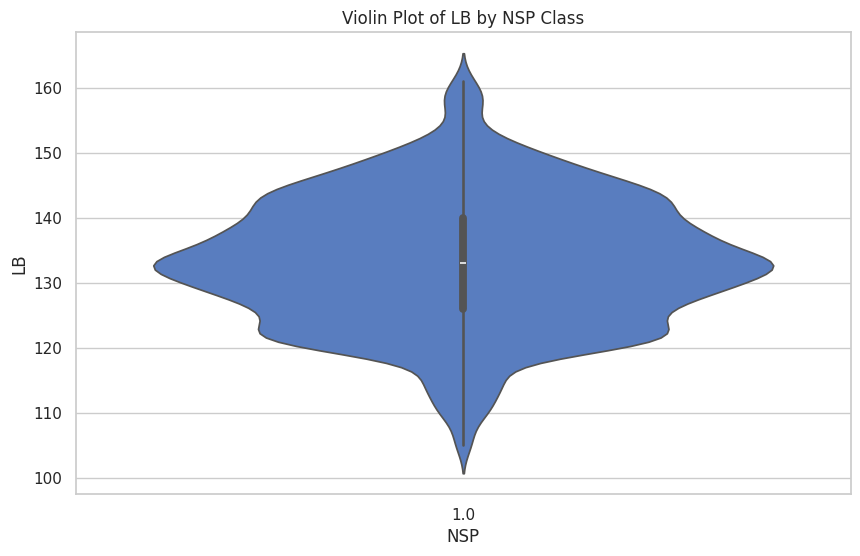

/tmp/ipython-input-9-4229979127.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette='muted')


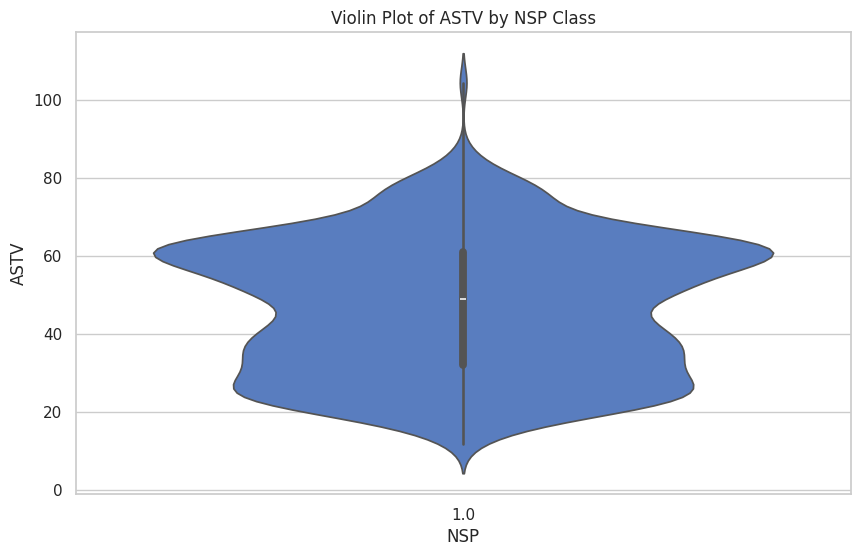

/tmp/ipython-input-9-4229979127.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette='muted')


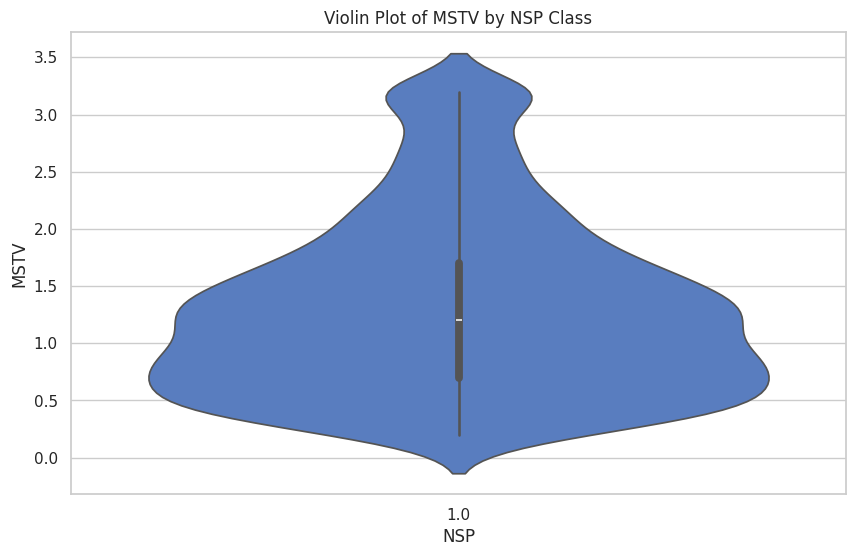

/tmp/ipython-input-9-4229979127.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette='muted')


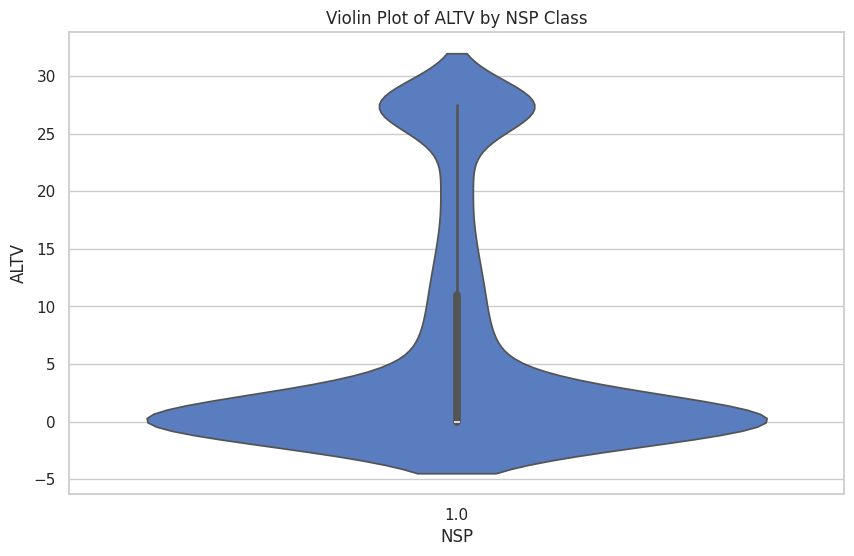

/tmp/ipython-input-9-4229979127.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette='muted')


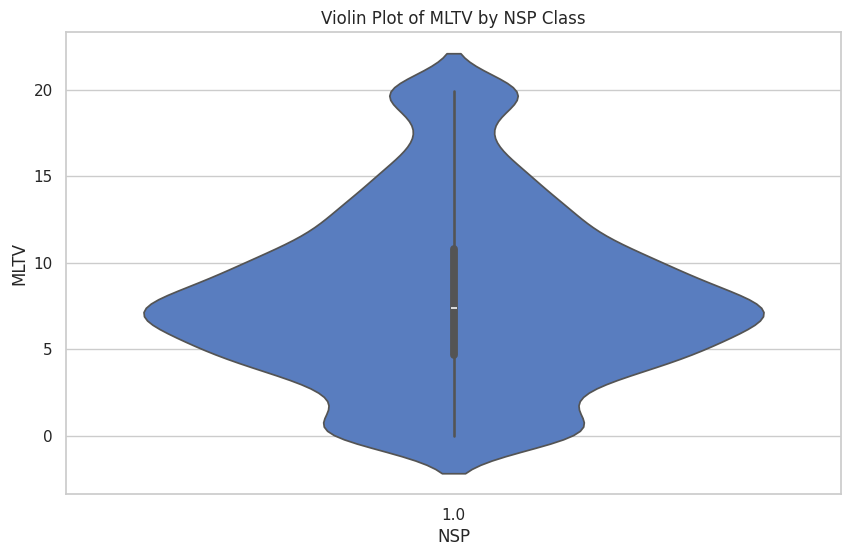

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the cleaned dataset
df = pd.read_csv('Cleaned_Cardiotocographic.csv')

# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

#Histograms for numerical features
df.hist(bins=20, figsize=(18, 12), edgecolor='black')
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

#Boxplots for detecting outliers
for col in df.columns:
    plt.figure()
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

#Bar chart for categorical variable 'NSP'
plt.figure()
sns.countplot(data=df, x='NSP', palette='pastel')
plt.title("Frequency of NSP (Target Variable)")
plt.xlabel("NSP Class")
plt.ylabel("Count")
plt.show()

#Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

#Scatter plots for a few feature pairs
sns.pairplot(df[['LB', 'ASTV', 'MSTV', 'MLTV', 'Width']], diag_kind='kde')
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

#Violin plots for variables vs target
for col in ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV']:
    plt.figure()
    sns.violinplot(x='NSP', y=col, data=df, palette='muted')
    plt.title(f"Violin Plot of {col} by NSP Class")
    plt.show()


Histograms showed how the data is spread out — some variables are skewed (not evenly spread).

Boxplots helped us spot outliers (very high or very low values).

Bar chart for NSP (fetal health class): Most babies were classified as 1 (normal), some as 2 (suspect), and fewer as 3 (pathologic).

Heatmap showed that:

ASTV, MSTV, and MLTV are positively related.

Some features are not strongly related to each other.

Violin plots showed how features like ASTV and DL change for different NSP classes — this gives clues about what affects fetal health